<a href="https://colab.research.google.com/github/EdWu-datascience/Netflix-recommend-algorithm/blob/main/netflix_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#first project
from google.colab import drive
drive.mount('/content/drive')
#解压打开dataset
import zipfile
import pandas as pd 
zip_file = zipfile.ZipFile('/content/drive/MyDrive/archive.zip')
df = pd.read_csv(zip_file.open('netflix_titles.csv'))
#查看csv文件
df.info()
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
#判断是否有重复数据
df.drop_duplicates()
#df.info()
#df.head()
#没有重复数据

In [ ]:
#分开电影和tv-show
df_movie = df[df['type']=='Movie']
df_tv = df[df['type']=='TV Show']

In [ ]:
#删除缺失数据
df_movie.dropna(inplace=True)
df_tv.dropna(inplace=True)
df_movie = df_movie.reset_index(drop = True)
df_tv = df_tv.reset_index(drop = True)

In [ ]:
df_movie.head()

In [ ]:
#删除停用词
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
from nltk.corpus import stopwords
i = 1
print(df_movie['description'][0])
print('\t')

In [ ]:
df_movie['raw'] = df_movie['rating']+' '+df_movie['listed_in']+' '+df_movie['description']
df_movie['processed'] = df_movie['raw'] 
print(df_movie['raw'][0])

TV-MA Dramas, International Movies After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.


In [ ]:
#text = nltk.word_tokenize(df_movie['raw'][0])
#先进行分词，然后再删除stopword
df_movie['processed'] = df_movie['raw'] 
text_process = []
for i in range(0,len(df_movie['raw'])):
#for i in range(0,1):
  text = nltk.word_tokenize(df_movie['raw'][i])
  r = []
  for word in text:
    if word not in stopwords.words('english'):
      r.append(word)
  text_process.append(r)
  df_movie['processed'][i] = str(r).replace("'","").replace(",","").replace(".","").replace("[","").replace("]",'').replace('"','')
      
    


In [ ]:
print(df_movie['processed'][1])
print(df_movie['raw'][1])

R Horror Movies  International Movies When army recruit found dead  fellow soldiers forced confront terrifying secret s haunting jungle island training camp 
R Horror Movies, International Movies When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp.


In [ ]:
#对description，rating，listed_in进行向量化并比较相似度
from sklearn.feature_extraction.text import TfidfVectorizer
vectorize = TfidfVectorizer()
df_movie['vectorize'] = df_movie['processed']
print(df_movie.head())
vec_movie = vectorize.fit_transform(df_movie['vectorize'])
print(vectorize.get_feature_names())
print(vec_movie.shape)
print(vec_movie)
#print(vec_movie.toarray())


  show_id  ...                                          vectorize
0      s2  ...  TV-MA Dramas  International Movies After devas...
1      s3  ...  R Horror Movies  International Movies When arm...
2      s4  ...  PG-13 Action & Adventure  Independent Movies  ...
3      s5  ...  PG-13 Dramas A brilliant group students become...
4      s7  ...  TV-MA Horror Movies  International Movies Afte...

[5 rows x 15 columns]
['007', '10', '100', '1000', '10000', '10th', '11', '1100', '112', '11th', '12', '12th', '13', '13000', '14', '14th', '15', '150', '15k', '16', '1666', '16th', '17', '18', '18000', '1800s', '1812', '1843', '1854', '1860s', '1866', '1867', '1870', '1880s', '1881', '1888', '1890', '1890s', '1892', '1895', '1899', '18th', '19', '1900s', '1901', '1902', '1905', '1913', '1920', '1920s', '1921', '1927', '1930s', '1931', '1937', '1940s', '1942', '1944', '1945', '1947', '1949', '1950s', '1953', '1958', '1959', '1960', '1960s', '1961', '1962', '1967', '1968', '1969', '1970', '1970s',

In [ ]:
import pandas as pd
vec_movie_pd = pd.DataFrame(vec_movie.toarray(),columns=vectorize.get_feature_names(),index=df_movie['title'])
print(vec_movie_pd)

            007   10  100  1000  10000  ...  ángel  émile  über  ōarai  şeref
title                                   ...                                  
7:19        0.0  0.0  0.0   0.0    0.0  ...    0.0    0.0   0.0    0.0    0.0
23:59       0.0  0.0  0.0   0.0    0.0  ...    0.0    0.0   0.0    0.0    0.0
9           0.0  0.0  0.0   0.0    0.0  ...    0.0    0.0   0.0    0.0    0.0
21          0.0  0.0  0.0   0.0    0.0  ...    0.0    0.0   0.0    0.0    0.0
122         0.0  0.0  0.0   0.0    0.0  ...    0.0    0.0   0.0    0.0    0.0
...         ...  ...  ...   ...    ...  ...    ...    ...   ...    ...    ...
Zombieland  0.0  0.0  0.0   0.0    0.0  ...    0.0    0.0   0.0    0.0    0.0
Zoo         0.0  0.0  0.0   0.0    0.0  ...    0.0    0.0   0.0    0.0    0.0
Zoom        0.0  0.0  0.0   0.0    0.0  ...    0.0    0.0   0.0    0.0    0.0
Zozo        0.0  0.0  0.0   0.0    0.0  ...    0.0    0.0   0.0    0.0    0.0
Zubaan      0.0  0.0  0.0   0.0    0.0  ...    0.0    0.0   0.0 

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
movie_simi = cosine_similarity(vec_movie_pd)
movie_simi_pd = pd.DataFrame(movie_simi,index = df_movie['title'],columns=df_movie['title'])
print(movie_simi_pd)

title           7:19     23:59         9  ...      Zoom      Zozo    Zubaan
title                                     ...                              
7:19        1.000000  0.009715  0.002201  ...  0.017581  0.020601  0.016009
23:59       0.009715  1.000000  0.004561  ...  0.004666  0.025034  0.010713
9           0.002201  0.004561  1.000000  ...  0.009967  0.002177  0.070568
21          0.004518  0.000000  0.049452  ...  0.008028  0.004469  0.004983
122         0.043770  0.042236  0.005184  ...  0.030632  0.021361  0.015621
...              ...       ...       ...  ...       ...       ...       ...
Zombieland  0.002483  0.026793  0.024702  ...  0.009070  0.002456  0.002738
Zoo         0.025644  0.055587  0.017549  ...  0.004967  0.025364  0.020603
Zoom        0.017581  0.004666  0.009967  ...  1.000000  0.013060  0.014562
Zozo        0.020601  0.025034  0.002177  ...  0.013060  1.000000  0.028693
Zubaan      0.016009  0.010713  0.070568  ...  0.014562  0.028693  1.000000

[4673 rows 

In [ ]:
print(type(movie_simi_pd['23:59'].to_frame()))
print(movie_simi_pd['23:59'].to_frame().sort_values(by='23:59',ascending=False).head(11))
wordclouds=list(movie_simi_pd['23:59'].to_frame().sort_values(by='23:59',ascending=False).head(11).index)
print(wordclouds)

<class 'pandas.core.frame.DataFrame'>
                                23:59
title                                
23:59                        1.000000
Camp X-Ray                   0.186785
The 3rd Eye                  0.180109
Kill Command                 0.173793
Tremors: Shrieker Island     0.170902
Pizza                        0.155384
In Defense of a Married Man  0.147305
The Decline                  0.147008
Darna Mana Hai               0.137480
The Autopsy of Jane Doe      0.137086
Elaan                        0.136241
['23:59', 'Camp X-Ray', 'The 3rd Eye', 'Kill Command', 'Tremors: Shrieker Island', 'Pizza', 'In Defense of a Married Man', 'The Decline', 'Darna Mana Hai', 'The Autopsy of Jane Doe', 'Elaan']


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = []
i = 1
for index,movie in df_movie.iterrows():
  if list(movie.to_frame().loc['title',:])[0] in wordclouds:
    #add=list(movie.to_frame().loc['listed_in',:])+list(movie.to_frame().loc['rating',:])+list(movie.to_frame().loc['description',:])
    add=list(movie.to_frame().loc['processed',:])
    text.append(add)
  #i = i+1
  #if i == 2:
    #break
print(str(text).replace('[','').replace(']','').replace("'",'').replace(",",'').replace(".",''))

R Horror Movies  International Movies When army recruit found dead  fellow soldiers forced confront terrifying secret s haunting jungle island training camp  R Dramas  Independent Movies Fresh Army recruit Amy Cole assigned Guantanamo Bay s Camp X-Ray  forms surprising bond one prisoners charge  TV-MA Horror Movies  International Movies  Thrillers Stranded jungle car breaks  six friends pass time exchanging horror stories  unaware may part one  TV-14 Action & Adventure  Cult Movies  International Movies Journalist Naresh hired probe illegal activities island  When s captured  fellow prisoner gives ring magic powers  TV-14 Dramas A lawyer s husband affair  When mistress found dead  becomes prime suspect – wife must take charge defense  TV-MA Action & Adventure  Independent Movies  Sci-Fi & Fantasy On remote island  elite soldiers discover training exercise actually experimental death trap teeming efficiently lethal robots  TV-14 Horror Movies  International Movies  Thrillers A pizza del

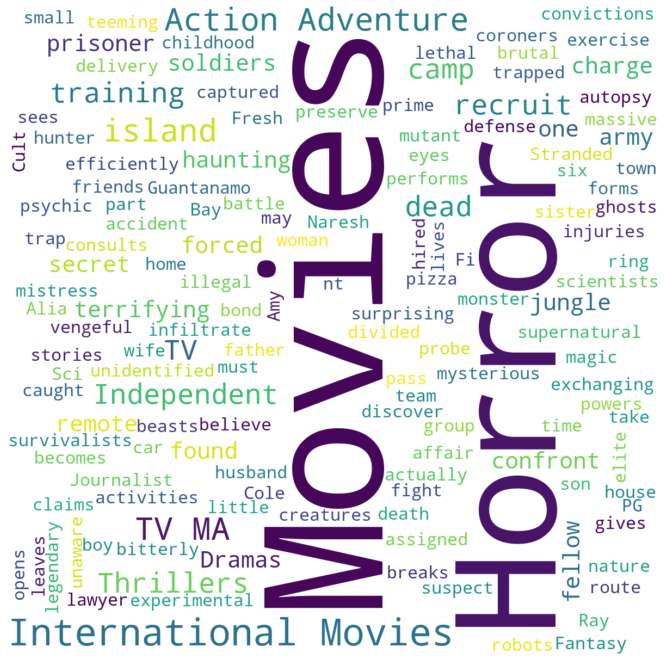

In [ ]:
wordcloud=WordCloud(width=1200,height=1200,background_color='white').generate(str(text))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('OFF')
plt.margins(x=0,y=0)
plt.show()